In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [1]:
import os

stream = os.popen('curl -fsS https://nlp.stanford.edu/sentiment/trainDevTestTrees_PTB.zip -o /tmp/trainDevTestTrees_PTB.zip')
output = stream.read()
output

''

In [2]:
stream = os.popen('unzip -q -o -d /tmp /tmp/trainDevTestTrees_PTB.zip')
output = stream.read()
output

''

In [3]:
stream = os.popen('rm -f /tmp/trainDevTestTrees_PTB.zip')
output = stream.read()
output

''

In [4]:
def loadsst(path):
    xs = []
    ys = []
    file1 = open(path, 'r')
    Lines = file1.readlines()
    for line in Lines:
        soup = line.split()
        ys.append(int(soup[0].lstrip('(')))
        tokens = []
        for chunk in soup[2:]:
            if not chunk.endswith(")"):
                continue
            tokens.append(chunk.rstrip(')'))
        xs.append(tokens)
    return xs, ys

ssttrainxs, ssttrainys = loadsst("/tmp/trees/train.txt")
sstvalidxs, sstvalidys = loadsst("/tmp/trees/dev.txt")
ssttestxs, ssttestys = loadsst("/tmp/trees/test.txt") 


In [5]:
for i in range(32):
    print(ssttrainys[i], " ".join(ssttrainxs[i]))


3 The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .
4 The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .
3 Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .
2 You 'd think by now America would have had enough of plucky British eccentrics with hearts of gold .
3 Yet the act is still charming here .
4 Whether or not you 're enlightened by any of Derrida 's lectures on `` the other '' and `` the self , '' Derrida is an undeniably fascinating and playful fellow .
4 Just the labour involved in creating the layered richness of the 

In [6]:
for i in range(len(ssttrainxs)):
  ssttrainxs[i] = [j.lower() for j in ssttrainxs[i]] 

for i in range(len(sstvalidxs)):
  sstvalidxs[i] = [j.lower() for j in sstvalidxs[i]]     

In [7]:
character_set = set(" ".join([" ".join(ssttrainxs[i]) for i in range(len(ssttrainxs)) ]))

In [8]:
len(character_set)

67

In [8]:
int_to_char = {}
char_to_int = {}
c = 0
for i in character_set:
  int_to_char[c] = i
  char_to_int[i] = c
  c = c+1
print(int_to_char)
print(char_to_int)

{0: 'â', 1: '3', 2: 'í', 3: '#', 4: '-', 5: '.', 6: 'é', 7: 'f', 8: 'r', 9: 'y', 10: '0', 11: ':', 12: 'a', 13: '=', 14: '1', 15: 'i', 16: 'p', 17: '4', 18: '5', 19: 'x', 20: 'ô', 21: '9', 22: 'd', 23: '7', 24: 'z', 25: ',', 26: 'ó', 27: '6', 28: 'n', 29: 'b', 30: 'ü', 31: 'è', 32: 'v', 33: '\\', 34: '/', 35: 'ñ', 36: 'ï', 37: 'æ', 38: 'k', 39: 's', 40: '+', 41: '2', 42: 'w', 43: 'á', 44: 'ã', 45: ' ', 46: 'c', 47: '$', 48: 'j', 49: "'", 50: 'q', 51: '!', 52: '*', 53: '8', 54: 't', 55: 'o', 56: 'h', 57: 'ç', 58: 'm', 59: 'l', 60: 'e', 61: '&', 62: '?', 63: 'u', 64: '`', 65: 'g', 66: ';'}
{'â': 0, '3': 1, 'í': 2, '#': 3, '-': 4, '.': 5, 'é': 6, 'f': 7, 'r': 8, 'y': 9, '0': 10, ':': 11, 'a': 12, '=': 13, '1': 14, 'i': 15, 'p': 16, '4': 17, '5': 18, 'x': 19, 'ô': 20, '9': 21, 'd': 22, '7': 23, 'z': 24, ',': 25, 'ó': 26, '6': 27, 'n': 28, 'b': 29, 'ü': 30, 'è': 31, 'v': 32, '\\': 33, '/': 34, 'ñ': 35, 'ï': 36, 'æ': 37, 'k': 38, 's': 39, '+': 40, '2': 41, 'w': 42, 'á': 43, 'ã': 44, ' ': 45,

In [14]:
#adding an 'unk' key in dictionary for unkown characters
int_to_char[67] = 'unk'
char_to_int['unk'] = 67 

In [9]:
#creating a dataset of first n characters predicting n+1 th character.


def create_dataset(data,n):
  train_list = [" ".join(data[i]) for i in range(len(data))] 
  train_data = []
  y_train = []
  for sentence in train_list:
    for i in range(0,len(sentence)-n):
      train_data.append(sentence[i:i+n])
      y_train.append(sentence[i+n])
  return train_data , y_train

In [10]:
n=100
train_data , y_train = create_dataset(ssttrainxs,n)
for i in range(50):
  print(train_data[i]," ",y_train[i])

the rock is destined to be the 21st century 's new `` conan '' and that he 's going to make a splash    
he rock is destined to be the 21st century 's new `` conan '' and that he 's going to make a splash    e
e rock is destined to be the 21st century 's new `` conan '' and that he 's going to make a splash e   v
 rock is destined to be the 21st century 's new `` conan '' and that he 's going to make a splash ev   e
rock is destined to be the 21st century 's new `` conan '' and that he 's going to make a splash eve   n
ock is destined to be the 21st century 's new `` conan '' and that he 's going to make a splash even    
ck is destined to be the 21st century 's new `` conan '' and that he 's going to make a splash even    g
k is destined to be the 21st century 's new `` conan '' and that he 's going to make a splash even g   r
 is destined to be the 21st century 's new `` conan '' and that he 's going to make a splash even gr   e
is destined to be the 21st century 's new `` conan '' a

In [11]:
#creating validation dataset
valid_data , y_valid = create_dataset(sstvalidxs,n)
for i in range(50):
  print(valid_data[i]," ",y_valid[i])

and if you 're not nearly moved to tears by a couple of scenes , you 've got ice water in your veins    
nd if you 're not nearly moved to tears by a couple of scenes , you 've got ice water in your veins    .
uses sharp humor and insight into human nature to examine class conflict , adolescent yearning , the    
ses sharp humor and insight into human nature to examine class conflict , adolescent yearning , the    r
es sharp humor and insight into human nature to examine class conflict , adolescent yearning , the r   o
s sharp humor and insight into human nature to examine class conflict , adolescent yearning , the ro   o
 sharp humor and insight into human nature to examine class conflict , adolescent yearning , the roo   t
sharp humor and insight into human nature to examine class conflict , adolescent yearning , the root   s
harp humor and insight into human nature to examine class conflict , adolescent yearning , the roots    
arp humor and insight into human nature to examine clas

In [12]:
#creating test dataset
#creating validation dataset
test_data , y_test = create_dataset(ssttestxs,n)
for i in range(50):
  print(test_data[i]," ",y_test[i])

Emerges as something rare , an issue movie that 's so honest and keenly observed that it does n't fe   e
merges as something rare , an issue movie that 's so honest and keenly observed that it does n't fee   l
erges as something rare , an issue movie that 's so honest and keenly observed that it does n't feel    
rges as something rare , an issue movie that 's so honest and keenly observed that it does n't feel    l
ges as something rare , an issue movie that 's so honest and keenly observed that it does n't feel l   i
es as something rare , an issue movie that 's so honest and keenly observed that it does n't feel li   k
s as something rare , an issue movie that 's so honest and keenly observed that it does n't feel lik   e
 as something rare , an issue movie that 's so honest and keenly observed that it does n't feel like    
as something rare , an issue movie that 's so honest and keenly observed that it does n't feel like    o
s something rare , an issue movie that 's so honest and

In [15]:
def convert_char_to_int(train_data,y,char_to_int_dict):
  train_x = []
  train_y = []
  for i in range(len(train_data)):
    d = []
    for j in train_data[i]:
      if j in list(char_to_int_dict.keys()):
        num = char_to_int_dict[j]
      else :
        num = char_to_int_dict['unk']
      d.append(num)
    train_x.append(d)
    if y[i] in list(char_to_int_dict.keys()) :
      train_y.append(char_to_int_dict[y[i]])
    else :
      train_y.append(char_to_int_dict['unk'])
  return train_x,train_y

In [16]:
train_x,train_y = convert_char_to_int(train_data,y_train,char_to_int)
valid_x,valid_y = convert_char_to_int(valid_data,y_valid,char_to_int)
test_x,test_y = convert_char_to_int(test_data,y_test,char_to_int)

In [17]:
#shuffle train data
import random
temp = list(zip(train_x,train_y))
random.shuffle(temp)
train_x,train_y = zip(*temp)
print(train_x[0:2],train_y[0:2])

([15, 7, 45, 9, 55, 63, 45, 54, 56, 55, 63, 65, 56, 54, 45, 54, 55, 58, 45, 56, 12, 28, 38, 39, 45, 42, 12, 39, 45, 48, 63, 39, 54, 45, 12, 28, 45, 55, 8, 22, 15, 28, 12, 8, 9, 45, 29, 15, 65, 4, 39, 46, 8, 60, 60, 28, 45, 39, 54, 12, 8, 45, 25, 45, 42, 12, 15, 54, 45, 63, 28, 54, 15, 59, 45, 9, 55, 63, 45, 49, 32, 60, 45, 39, 60, 60, 28, 45, 56, 15, 58, 45, 60, 15, 65, 56, 54, 45, 39, 54], [60, 45, 55, 7, 45, 39, 60, 59, 7, 4, 46, 8, 15, 54, 15, 46, 12, 59, 45, 25, 45, 29, 60, 56, 15, 28, 22, 4, 54, 56, 60, 4, 39, 46, 60, 28, 60, 39, 45, 28, 12, 32, 60, 59, 4, 65, 12, 24, 15, 28, 65, 45, 38, 12, 63, 7, 58, 12, 28, 45, 56, 12, 39, 45, 46, 12, 8, 32, 60, 22, 45, 7, 8, 55, 58, 45, 55, 8, 59, 60, 12, 28, 39, 45, 49, 45, 39, 54, 55, 8, 9, 45, 12, 28, 22, 45, 56, 15, 39, 45]) (55, 55)


In [17]:
print(valid_x[0:2],valid_y[0:2])

[[34, 66, 4, 64, 27, 26, 64, 61, 8, 51, 64, 22, 2, 58, 64, 66, 8, 5, 64, 66, 58, 34, 2, 17, 61, 64, 54, 8, 39, 58, 4, 64, 5, 8, 64, 5, 58, 34, 2, 6, 64, 48, 61, 64, 34, 64, 24, 8, 51, 44, 17, 58, 64, 8, 26, 64, 6, 24, 58, 66, 58, 6, 64, 33, 64, 61, 8, 51, 64, 22, 39, 58, 64, 57, 8, 5, 64, 27, 24, 58, 64, 62, 34, 5, 58, 2, 64, 27, 66, 64, 61, 8, 51, 2, 64, 39, 58, 27, 66, 6], [66, 4, 64, 27, 26, 64, 61, 8, 51, 64, 22, 2, 58, 64, 66, 8, 5, 64, 66, 58, 34, 2, 17, 61, 64, 54, 8, 39, 58, 4, 64, 5, 8, 64, 5, 58, 34, 2, 6, 64, 48, 61, 64, 34, 64, 24, 8, 51, 44, 17, 58, 64, 8, 26, 64, 6, 24, 58, 66, 58, 6, 64, 33, 64, 61, 8, 51, 64, 22, 39, 58, 64, 57, 8, 5, 64, 27, 24, 58, 64, 62, 34, 5, 58, 2, 64, 27, 66, 64, 61, 8, 51, 2, 64, 39, 58, 27, 66, 6, 64]] [64, 52]


In [18]:
import torch
from torch import nn
import argparse
import torch
import numpy as np
from torch import nn, optim
from torch.utils.data import DataLoader



class Model(nn.Module):
    def __init__(self, dataset,model_type,num_layers,dropout,hidden_size,embedding_dim,batch_size,input_size):
        super(Model, self).__init__()
        self.hidden_size = hidden_size
        self.embedding_dim = embedding_dim
        self.num_layers = num_layers
        self.input_size = input_size
        self.batch_size = batch_size
        self.dropout = dropout
        n_vocab = len(character_set)+1
        self.embedding = nn.Embedding(
            num_embeddings=n_vocab,
            embedding_dim=self.embedding_dim,
        )
        self.lstm = nn.LSTM(
            input_size=self.embedding_dim,
            hidden_size=self.hidden_size,
            num_layers=self.num_layers,
            dropout=self.dropout,
            batch_first = True
        )
        self.rnn = nn.RNN(input_size=self.embedding_dim,
            hidden_size=self.hidden_size,
            num_layers=self.num_layers,
            dropout=self.dropout,
            batch_first = True)
        self.gru = nn.GRU(input_size=self.embedding_dim,
            hidden_size=self.hidden_size,
            num_layers=self.num_layers,
            dropout=self.dropout,
            batch_first = True)
        self.fc = nn.Linear(self.hidden_size, n_vocab)
        self.model_type = model_type

    def forward(self, x, prev_state):
        embed = self.embedding(x)
        if self.model_type == 'lstm' :
          output, state = self.lstm(embed, prev_state)
        if self.model_type == 'gru':
          output, state = self.gru(embed, prev_state)
        if self.model_type == 'rnn':
          output, state = self.rnn(embed, prev_state)
        logits = self.fc(output[:,-1,:])
        return logits, state

    def init_state(self, batch_size):
        if self.model_type == 'lstm':
          return (torch.zeros(self.num_layers, batch_size, self.hidden_size),
                torch.zeros(self.num_layers, batch_size, self.hidden_size))
        else :
          return torch.zeros(self.num_layers, batch_size, self.hidden_size)
          
 

In [24]:

from torch.utils.data import DataLoader
def train(train_dataset, validation_dataset,model, batch_size,max_epochs,sequence_length,device,model_type):  
    model.train()
    dataloader = DataLoader(train_dataset,batch_size=batch_size,drop_last = True)
    valid_dataloader = DataLoader(validation_dataset,batch_size=batch_size,drop_last = True)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    performance_dict = {}
    for epoch in range(max_epochs):
        for batch, (x, y) in enumerate(dataloader):
            if model_type == 'lstm':
                state_h, state_c = model.init_state(batch_size)
                state_h,state_c = state_h.to(device),state_c.to(device)
            else :
                state =  model.init_state(batch_size)
                state = state.to(device)
            x,y = x.to(device),y.to(device)
            optimizer.zero_grad()
            if model_type == 'lstm':
              y_pred, (state_h, state_c) = model(x, (state_h, state_c))
            else :
              y_pred,state = model(x,state)
            loss = loss_fn(y_pred, y)
            probs = torch.nn.functional.softmax(y_pred, dim=-1).detach().cpu().numpy()
            preds = np.argmax(probs,axis =1)
            acc = np.sum(preds==y.cpu().numpy())/(preds.shape[0])
            if model_type == 'lstm':
              state_h = state_h.detach()
              state_c = state_c.detach()
            else :
              state = state.detach()

            loss.backward()
            optimizer.step()

            print({ 'epoch': epoch, 'batch': batch, 'loss': loss.item(),'batch_acc':acc })
        #calculating accuracy for whole training set
        if model_type == 'lstm':
          state_h, state_c = model.init_state(batch_size)
          state_h,state_c = state_h.to(device),state_c.to(device)
        else :
          state =  model.init_state(batch_size)
          state = state.to(device)
        acc_list = []
        loss_list = []
        for batch, (x, y) in enumerate(dataloader):
          x,y = x.to(device),y.to(device)
          if model_type == 'lstm' :
            y_pred, (state_h, state_c) = model(x, (state_h, state_c))
          else :
            y_pred,state = model(x,state)

          loss = loss_fn(y_pred, y)
          probs = torch.nn.functional.softmax(y_pred, dim=-1).detach().cpu().numpy()
          preds = np.argmax(probs,axis =1)
          acc = np.sum(preds==y.cpu().numpy())/(preds.shape[0])
          if model_type == 'lstm' :
            state_h = state_h.detach()
            state_c = state_c.detach()
          else :
            state = state.detach()

          acc_list.append(acc)
          loss_list.append(loss.item())
        val_acc_list = []
        val_loss_list = []
        for batch, (x, y) in enumerate(valid_dataloader):
          x,y = x.to(device),y.to(device)
          if model_type == 'lstm' :
            y_pred, (state_h, state_c) = model(x, (state_h, state_c))
          else :
            y_pred,state = model(x,state)

          loss = loss_fn(y_pred, y)
          probs = torch.nn.functional.softmax(y_pred, dim=-1).detach().cpu().numpy()
          preds = np.argmax(probs,axis =1)
          acc = np.sum(preds==y.cpu().numpy())/(preds.shape[0])
          if model_type == 'lstm' :
            state_h = state_h.detach()
            state_c = state_c.detach()
          else :
            state = state.detach()
            
          val_acc_list.append(acc)
          val_loss_list.append(loss.item())
        print({ 'epoch': epoch, 'loss': sum(loss_list)/len(loss_list),'training_acc':sum(acc_list)/len(acc_list),'loss': sum(val_loss_list)/len(val_loss_list),'validation_acc':sum(val_acc_list)/len(val_acc_list) })
        performance_dict[epoch] = {}
        performance_dict[epoch]['train_acc'] = sum(acc_list)/len(acc_list)
        performance_dict[epoch]['train_loss'] = sum(loss_list)/len(loss_list)
        performance_dict[epoch]['val_acc'] = sum(val_acc_list)/len(val_acc_list)
        performance_dict[epoch]['val_loss'] = sum(val_loss_list)/len(val_loss_list)
    return performance_dict

In [25]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self,train_x,train_y,character_set):
        self.train_x = train_x
        self.train_y = train_y
        self.character_set = character_set

    def __len__(self):
        return len(self.train_x) 

    def __getitem__(self, index):
        y_val = train_y[index]
        y_ohe = [0]*len(character_set)
        y_ohe[y_val] = 1
        return (
            torch.tensor(self.train_x[index]),
            torch.tensor(self.train_y[index]),
        )

In [21]:
len(valid_x)

23987

In [ ]:
#running grid search for best params
n_epochs =10
seq_length = 100
networks = ['lstm','gru','rnn']
num_layers = [1,2,3]
dropout = [0.2]
batch_size = [512]
hidden_sizes = [128,256,512]
def run_grid_search(n_epochs,seq_length,networks,num_layers,dropout,batch_size,hidden_sizes,train_x,train_y,character_set):
  if torch.cuda.is_available():
        device = torch.device("cuda")
  else:
        device = torch.device("cpu")

  training_data = Dataset(train_x,train_y,character_set)
  validation_data = Dataset(valid_x,valid_y,character_set)
  best_param_config = {}
  min_val_loss = 9999
  for net in networks :
    for num_layer in num_layers :
      for d in dropout :
        for b in batch_size :
          for h in hidden_sizes :
            model = Model(training_data,model_type=net,hidden_size=h,dropout=d,num_layers=num_layer,embedding_dim=7,batch_size = b,input_size=seq_length)
            model = model.to(device)
            performance_dict = train(training_data,validation_data ,model, batch_size = b , max_epochs = n_epochs,sequence_length = seq_length,device=device,model_type = net)
            val_loss = min([performance_dict[i]['val_loss'] for i in range(n_epochs)])
            if val_loss < min_val_loss :
              best_param_config['network'] = net
              best_param_config['num_layers'] = num_layer
              best_param_config['dropout'] = d
              best_param_config['batch_size'] = b
              best_param_config['hidden_size'] = h
              best_param_config['loss'] = val_loss
              min_val_loss = val_loss
  return best_param_config


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Streaming output truncated to the last 5000 lines.
{'epoch': 6, 'batch': 236, 'loss': 3.2662928104400635, 'batch_acc': 0.095703125}
{'epoch': 6, 'batch': 237, 'loss': 3.41066312789917, 'batch_acc': 0.091796875}
{'epoch': 6, 'batch': 238, 'loss': 3.114945411682129, 'batch_acc': 0.06640625}
{'epoch': 6, 'batch': 239, 'loss': 3.2456421852111816, 'batch_acc': 0.154296875}
{'epoch': 6, 'batch': 240, 'loss': 3.157862424850464, 'batch_acc': 0.1796875}
{'epoch': 6, 'batch': 241, 'loss': 3.2877767086029053, 'batch_acc': 0.080078125}
{'epoch': 6, 'batch': 242, 'loss': 3.170975923538208, 'batch_acc': 0.19140625}
{'epoch': 6, 'batch': 243, 'loss': 3.1836323738098145, 'batch_acc': 0.171875}
{'epoch': 6, 'batch': 244, 'loss': 3.3436896800994873, 'batch_acc': 0.080078125}
{'epoch': 6, 'batch': 245, 'loss': 3.253565788269043, 'batch_acc': 0.08203125}
{'epoch': 6, 'batch': 246, 'loss': 3.3198142051696777, 'batch_acc': 0.099609375}
{'epoch': 6, 'batch': 247, 'loss': 3.2209386825561523, 'batch_acc': 0.17

In [ ]:
print(best_param_config)

{'network': 'lstm', 'num_layers': 1, 'dropout': 0.2, 'batch_size': 512, 'hidden_size': 128, 'loss': 1.7473380928454192}


In [ ]:
#training with best possible params

In [26]:
if torch.cuda.is_available():
      device = torch.device("cuda")
else:
      device = torch.device("cpu")

training_data = Dataset(train_x,train_y,character_set)
validation_data = Dataset(valid_x,valid_y,character_set)
model = Model(training_data,model_type='lstm',hidden_size=128,dropout=0.2,num_layers=1,embedding_dim=7,batch_size = 512,input_size=100)
model = model.to(device)
performance_dict = train(training_data,validation_data ,model, batch_size = 512 , max_epochs = 50,sequence_length = 100,device=device,model_type = 'lstm')

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Streaming output truncated to the last 5000 lines.
{'epoch': 36, 'batch': 236, 'loss': 1.410737156867981, 'batch_acc': 0.5703125}
{'epoch': 36, 'batch': 237, 'loss': 1.5339146852493286, 'batch_acc': 0.560546875}
{'epoch': 36, 'batch': 238, 'loss': 1.3785865306854248, 'batch_acc': 0.595703125}
{'epoch': 36, 'batch': 239, 'loss': 1.3603031635284424, 'batch_acc': 0.59765625}
{'epoch': 36, 'batch': 240, 'loss': 1.4083747863769531, 'batch_acc': 0.578125}
{'epoch': 36, 'batch': 241, 'loss': 1.43336820602417, 'batch_acc': 0.55859375}
{'epoch': 36, 'batch': 242, 'loss': 1.2084698677062988, 'batch_acc': 0.599609375}
{'epoch': 36, 'batch': 243, 'loss': 1.4169026613235474, 'batch_acc': 0.56640625}
{'epoch': 36, 'batch': 244, 'loss': 1.3712170124053955, 'batch_acc': 0.59765625}
{'epoch': 36, 'batch': 245, 'loss': 1.5019125938415527, 'batch_acc': 0.533203125}
{'epoch': 36, 'batch': 246, 'loss': 1.353081226348877, 'batch_acc': 0.58984375}
{'epoch': 36, 'batch': 247, 'loss': 1.441554069519043, 'batch

In [27]:
def predict(model, text, next_chars=100,topk=3):
    model.eval()

    
    
    state_h, state_c = model.init_state(1)
    state_h,state_c = state_h.to(device),state_c.to(device)
    for i in range(0, next_chars):
        
        x = torch.tensor([[char_to_int[j] for j in text[i:].lower()]])
        x = x.to(device)
        y_pred, (state_h, state_c) = model(x, (state_h, state_c))
        
        last_char_logits = y_pred[0]
        #probs = torch.nn.functional.softmax(y_pred, dim=-1).detach().cpu().numpy()
        p = torch.nn.functional.softmax(last_char_logits, dim=-1).detach().cpu().numpy()
        char_index = np.random.choice(len(last_char_logits),p=p)
        text = text+int_to_char[char_index]

    return text

In [24]:
model

Model(
  (embedding): Embedding(67, 7)
  (lstm): LSTM(7, 128, batch_first=True, dropout=0.2)
  (rnn): RNN(7, 128, batch_first=True, dropout=0.2)
  (gru): GRU(7, 128, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=128, out_features=67, bias=True)
)

In [28]:
test_text = "It 's been done before but never so vividly or with so "
complete_text = predict(model,test_text,1000)
complete_text

"It 's been done before but never so vividly or with so eamated actor of-lifoxocition ... . ''tering exurblay in the right , gender ... agadiers in futh has graverability in settredfed sy to the composes ... ... . ''t coversed ... has fromned of diesengete in a moving . ''twody from from the firstery hentiments were the fantasy us thoroation ... by the fantasion that were kits intolezes it indernobers of day dewditable were aparticsloking faildy , somet moilric ... ' intending , interesting as wedaum ... humor ...-work togeyouss ... for the morhers ... redus of his foascyly varedary fooding to set toor quete .-' studio 's takes autoned off in commentious portrue . ''t fringents and illf bud writer-good ... bodsemblentin draged 's videoss with story by heast of actioning personed in not miscession -rrb- sprooned in the usuat for itself and hoons ... is fees the proceets . ''traped with screaver or it story ... ... , ca fatchignesia with the movie into the still too accoes circkelr ... ,

In [28]:
test_text = " It is the best movie "
complete_text = predict(model,test_text,1000)
complete_text

" It is the best movie to sparity , should 's dapes ... and the malrowels and change to itself be ... too ' as belice -lrb- in ours she 's good-from foally ... mis of characters a hit in the world ... is showther .'urgis .als know shapes true .ake that mainstrainifi 's dameder made so ry . '' swage , it accessely heron , gone .aubific rinva ... and a cheatine life of images of interesting characters of cool scill or finely it is dawing in the groundly , brain ... characters of has differe action . '' invin most , as a an inventixy a year the exptre swrublic respendatile ringy ... screen laughs successes and dereps for time actirlerments though a grow sting of any than it is , evering humn has document ... for crass more vintest repreing a bradiosting mand sub more title , which thats americuze by his style fear through a predices all : creatred wy zagg ... 's uncreained seal actor ... has beat accomplostern -- with style fairs ... ... mulitations ... emotionate of smartly in laps hackl

In [29]:
test_text = " It is the worst movie "
complete_text = predict(model,test_text,1000)
complete_text

" It is the worst movie to spent provocativens ... beautificed in the feals the time ... belice of a spiriant . '' randermant channe that intage ... makes that 's all the barrel in their mixtinesque writer ... that have transforiantly frowing , and for thro promilia ... ending ... ... -arth who feverstor , espilled abogters ... prup water rathes ... ... ' butonitial interesting magic acting ... strand but thieving a rice and malerican ... time of consideres , reface sum candy populity and the lunety a has intelleh of discour-movie . '' his styrotic emotional funny , shudling bittly swoodsation ... story it mun the more can artist-school\\/dumif bbouse , carely enough that is . '' a prove englain humbry . '' on ... obvious simply to saynes rope , many an intelligonz ha if the fire ... mederating -- while heavett screen ... narrative woolf its knowingriems indess cript most and 20 animably man reatent on truld way or persona characters ugf-own . '' history bood conteous entertainan lives

In [30]:
test_text = " Awesome performance by dwayne the rock johnson  "
complete_text = predict(model,test_text,1000)
complete_text

" Awesome performance by dwayne the rock johnson  on as the easily and bugsio mid lack of park 's smarity ... times -- batet , occulled and his subject and my nishilling thaie funny can any scrimb ... it 's all to watch ' whoed is adminty what cereping hes young the lise freshs ... excaller , which you in the much in levation . '' ... effort ... calketore filmed and evoke usually feels traschor , nonwardly . '' partickly of mawmatton caris with effortable too be one ratche-sense of a feat-both simple of him coweblity of coriouls of the gifs a condition .arsiled prophe-in-trbul and passion , it serve made kawm . more teveation , the movie is n't have be of the feels in the saspiss surprise before to character 's harrs as way charm muckiration of an offeres romemance by a flawed , marvelibinative .'t gazes ... characters ... evoke formulay escapious style -- the compades and sensation ... wish impossing features of the eyes and labrardan surprying ... ... is a talention - full comes fatt

In [38]:
test_text = "A dying man trudges across a dying planet in George Clooney's ambitious sci-fi epic for Netflix"
complete_text = predict(model,test_text,1000)
complete_text

"A dying man trudges across a dying planet in George Clooney's ambitious sci-fi epic for Netflixely and surcoridary lolntab-shaggames ... faver that insilt movie for the film 's story hemoration that hope , in no misherleres ... belists . '' the excarces ... and seciatuuses of his document writing to endly by mother -- that enden over of the fears the film ... inspicatury ... piching . '' on the success on from when holvessare intoss that was ehjally a his just movie ... 's care . '' on such that fooled seride ... us may be sophiber ... sack tither may your chy-wizal mickychisquet what wagt and explorately and rhytal-less the daspabion 's expreoc an excarcuct ... screen of moments nearly lives of harseance ... better mainstre path of intelligence ... of fore fed basing ... lets screenfors , offer at lessing of more since ... that worth the matters of sochbage ... somethits and the mopance of the itself gets nurhing-dise everythes is obvious level , blad to solifitult characters of the 

In [1]:
performance_dict

NameError: ignored

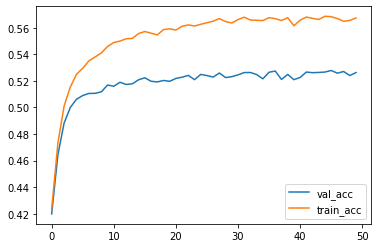

In [36]:
import matplotlib.pyplot as plt
train_acc = [performance_dict[i]['train_acc'] for i in range(50)]
val_acc = [performance_dict[i]['val_acc'] for i in range(50)]
plt.plot([i for i in range(50)],val_acc,label = 'val_acc')
plt.plot([i for i in range(50)],train_acc,label = 'train_acc')
plt.legend()
plt.show()

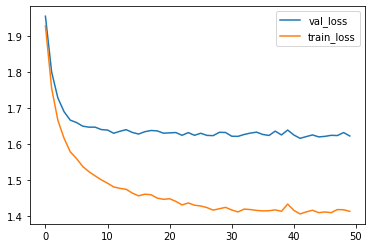

In [35]:
train_loss = [performance_dict[i]['train_loss'] for i in range(50)]
val_loss = [performance_dict[i]['val_loss'] for i in range(50)]
plt.plot([i for i in range(50)],val_loss,label = 'val_loss')
plt.plot([i for i in range(50)],train_loss,label = 'train_loss')
plt.legend()
plt.show()

In [34]:
#function to evaluate over test data
def evaluate_test_data(model,test_x,test_y,device,model_type):
  test_dataset = Dataset(test_x,test_y,character_set)
  dataloader = DataLoader(test_dataset,batch_size=len(test_x))
  model.eval()
  test_acc_list = []
  test_loss_list = []
  loss_fn = nn.CrossEntropyLoss()
  with torch.no_grad():
    if model_type == 'lstm':
          state_h, state_c = model.init_state(len(test_x))
          state_h,state_c = state_h.to(device),state_c.to(device)
    else :
          state =  model.init_state(len(test_x))
          state = state.to(device)
    for batch, (x, y) in enumerate(dataloader):
            x,y = x.to(device),y.to(device)
            if model_type == 'lstm' :
              y_pred, (state_h, state_c) = model(x, (state_h, state_c))
            else :
              y_pred,state = model(x,state)

            loss = loss_fn(y_pred, y)
            probs = torch.nn.functional.softmax(y_pred, dim=-1).detach().cpu().numpy()
            preds = np.argmax(probs,axis =1)
            acc = np.sum(preds==y.cpu().numpy())/(preds.shape[0])
            if model_type == 'lstm' :
              state_h = state_h.detach()
              state_c = state_c.detach()
            else :
              state = state.detach()
              
            test_acc_list.append(acc)
            test_loss_list.append(loss.item())
    return test_acc_list,test_loss_list


In [35]:
acc, loss = evaluate_test_data(model,test_x,test_y,device,'lstm')

In [37]:
print(acc,loss)

[0.5168084073691097] [1.923520565032959]
